# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 4

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

2010-01-15 00:00:00 BUY  21 SPY @ 113.64
2010-01-19 00:00:00 BUY  21 SPY @ 115.06
2010-01-21 00:00:00 BUY  22 SPY @ 111.70
2010-01-22 00:00:00 BUY  23 SPY @ 109.21
2010-01-28 00:00:00 BUY  23 SPY @ 108.57
2010-01-29 00:00:00 BUY  23 SPY @ 107.39
2010-02-02 00:00:00 BUY  91 SPY @ 110.38
2010-02-04 00:00:00 BUY  23 SPY @ 106.44
2010-02-08 00:00:00 BUY  24 SPY @ 105.89
2010-02-16 00:00:00 BUY  47 SPY @ 109.74
2010-04-27 00:00:00 BUY  21 SPY @ 118.48
2010-05-04 00:00:00 BUY  22 SPY @ 117.52
2010-05-05 00:00:00 BUY  22 SPY @ 116.82
2010-05-06 00:00:00 BUY  23 SPY @ 112.94
2010-06-15 00:00:00 BUY  88 SPY @ 112.00
2010-10-04 00:00:00 BUY  21 SPY @ 113.75
2010-10-05 00:00:00 BUY  21 SPY @ 116.04
2010-11-12 00:00:00 BUY  20 SPY @ 120.20
2010-11-15 00:00:00 BUY  21 SPY @ 120.03
2010-11-16 00:00:00 BUY  21 SPY @ 118.16
2010-12-01 00:00:00 BUY  62 SPY @ 121.01
2011-01-28 00:00:00 BUY  19 SPY @ 127.72
2011-02-01 00:00:00 BUY  19 SPY @ 130.74
2011-02-22 00:00:00 BUY  19 SPY @ 131.83
2011-02-23 00:00

Retrieve log DataFrames

In [7]:
s.rlog, s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [8]:
s.rlog.tail(100)

,date,price,shares,entry_exit
273,2016-10-11,213.43,17,entry
274,2016-10-13,213.01,17,entry
275,2016-10-17,212.38,18,entry
276,2016-10-19,214.28,52,exit
277,2016-10-27,213.17,17,entry
278,2016-10-28,212.54,18,entry
279,2016-11-01,211.01,18,entry
280,2016-11-02,209.74,18,entry
281,2016-11-07,213.15,71,exit
282,2016-12-01,219.57,17,entry


In [9]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
163,2015-06-05,209.77,2015-06-18,212.78,3.01,48.16,16,3985.10
164,2015-06-08,208.48,2015-06-18,212.78,4.30,77.40,18,4062.50
165,2015-06-25,209.86,2015-07-13,209.77,-0.09,-1.44,16,4061.06
166,2015-06-26,209.82,2015-07-13,209.77,-0.05,-0.85,17,4060.21
167,2015-06-29,205.42,2015-07-13,209.77,4.35,73.95,17,4134.16
168,2015-07-23,210.18,2015-08-10,210.57,0.39,6.24,16,4140.40
169,2015-07-24,208.00,2015-08-10,210.57,2.57,43.69,17,4184.09
170,2015-07-27,206.79,2015-08-10,210.57,3.78,64.26,17,4248.35
171,2015-08-06,208.35,2015-08-10,210.57,2.22,37.74,17,4286.09
172,2015-08-19,208.32,2015-09-15,198.46,-9.86,-167.62,17,4118.47


In [10]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-10-15,15388.44,15388.44,15388.44,0,15388.44,1
2019-10-16,15388.44,15388.44,15388.44,0,15388.44,1
2019-10-17,15388.44,15388.44,15388.44,0,15388.44,1
2019-10-18,15388.44,15388.44,15388.44,0,15388.44,1
2019-10-21,15388.44,15388.44,15388.44,0,15388.44,1


Generate strategy stats - display all available stats

In [11]:
pf.print_full(s.stats)

start                                                  2010-01-04
end                                                    2019-10-21
beginning_balance                                           10000
ending_balance                                           15388.44
total_net_profit                                          5388.44
gross_profit                                              9222.81
gross_loss                                               -3834.37
profit_factor                                                2.41
return_on_initial_capital                                   53.88
annual_return_rate                                           4.50
trading_period                           9 years 9 months 17 days
pct_time_in_market                                          32.47
total_num_trades                                              263
num_winning_trades                                            208
num_losing_trades                                              55
num_even_t

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2010-01-04 00:00:00 BUY  88 SPY @ 113.33
2019-10-21 00:00:00 SELL 88 SPY @ 299.99


Plot Equity Curves: Strategy vs Benchmark

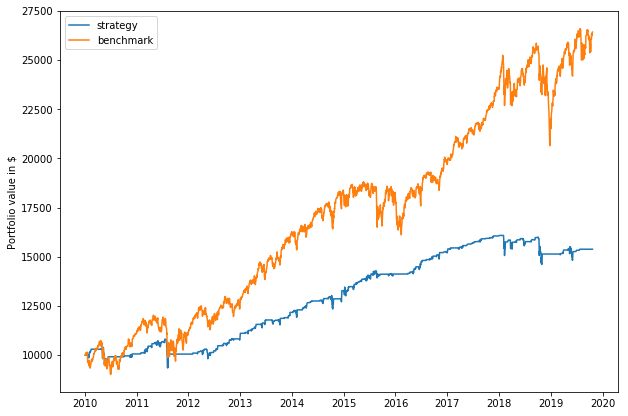

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

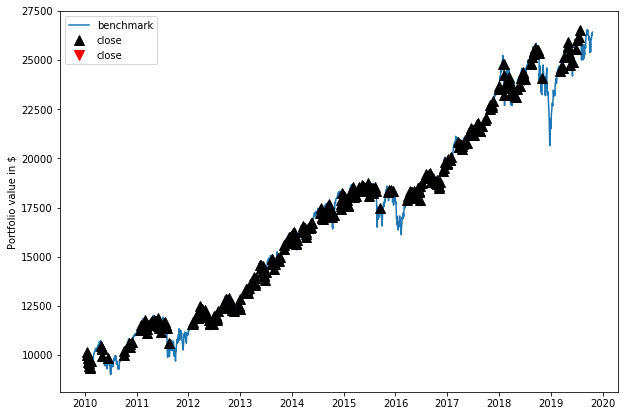

In [14]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,4.50,10.43
max_closed_out_drawdown,-13.39,-20.16
drawdown_annualized_return,-2.98,-1.93
drawdown_recovery,-0.05,-0.26
best_month,7.41,14.12
worst_month,-12.43,-16.27
sharpe_ratio,0.62,0.74
sortino_ratio,0.40,0.94
monthly_std,1.51,3.51


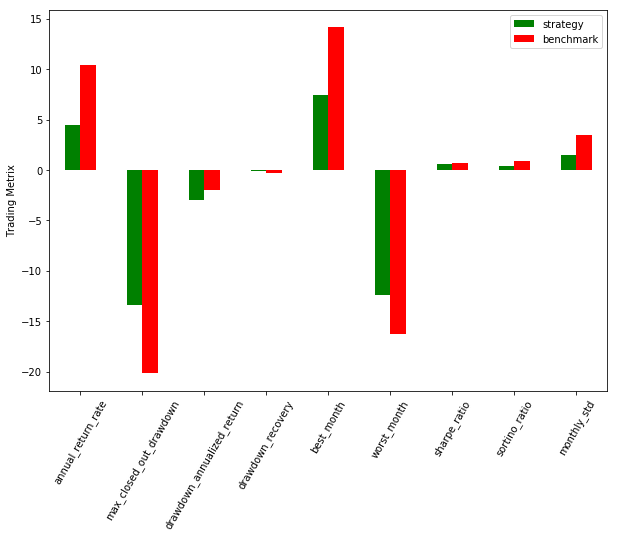

In [15]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df